In [1]:
%load_ext watermark
%watermark -g -co -a Ashish.Dhiman -d -t -m -u 

Author: Ashish.Dhiman

Last updated: 2022-07-09 00:02:07

conda environment: rbi_pmts_data

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: fd6dafa6fa41d76a904b5ab6aa6a4c7262054f3f



In [2]:
import pandas as pd
import numpy as np

### EDA of cleaned data

In [3]:
cleaned_pmts = pd.read_csv("../data/cleaned_data.csv",index_col=0,header=[0,1])
cleaned_pmts.shape

(760, 48)

In [4]:
cleaned_pmts.columns

MultiIndex([(                                                           'AePS', ...),
            (                                                           'AePS', ...),
            (                                'AePS (through micro-ATMs / BCs)', ...),
            (                                'AePS (through micro-ATMs / BCs)', ...),
            (                                                           'BBPS', ...),
            (                                                           'BBPS', ...),
            (                                                            'CTS', ...),
            (                                                            'CTS', ...),
            (                            'Credit Card (At PoS and e-Commerce)', ...),
            (                            'Credit Card (At PoS and e-Commerce)', ...),
            (                                             'Credit Card at PoS', ...),
            (                                         

In [5]:
cleaned_pmts.head()

pmt_type              AePS          AePS (through micro-ATMs / BCs)            \
data_type              Val      Vol                             Val       Vol   
Data for the day                                                                
June 1, 2020      7.682205  0.43618                      696.561179  29.01883   
June 2, 2020      7.665516  0.44138                      676.752623  28.29832   
June 3, 2020      7.476038  0.43952                      668.884848  28.85204   
June 4, 2020      7.323838  0.44828                      648.922639  29.56756   
June 5, 2020      7.324794  0.47535                      646.989160  32.65205   

pmt_type           BBPS                       CTS           \
data_type           Val   Vol                 Val      Vol   
Data for the day                                             
June 1, 2020      95.36  5.43          15056.2426  17.5486   
June 2, 2020      81.15  5.21  16041.190345467969    18.25   
June 3, 2020      81.36  5.24            14536.47    16.76   
June 4, 2020      83.05  5.51            14865.92    17.39   
June 5, 2020      85.94  5.33            15214.06    18.25   

pmt_type         Credit Card (At PoS and e-Commerce)      ...  \
data_type                                        Val Vol  ...   
Data for the day                                          ...   
June 1, 2020                                     NaN NaN  ...   
June 2, 2020                                     NaN NaN  ...   
June 3, 2020                                     NaN NaN  ...   
June 4, 2020                                     NaN NaN  ...   
June 5, 2020                                     NaN NaN  ...   

pmt_type         Prepaid Payment Instruments (PPIs) Card at PoS      \
data_type                                                   Val Vol   
Data for the day                                                      
June 1, 2020                                                NaN NaN   
June 2, 2020                                                NaN NaN   
June 3, 2020                                                NaN NaN   
June 4, 2020                                                NaN NaN   
June 5, 2020                                                NaN NaN   

pmt_type         Prepaid Payment Instruments (PPIs) Card at e-Commerce      \
data_type                                                          Val Vol   
Data for the day                                                             
June 1, 2020                                                    NaN    NaN   
June 2, 2020                                                    NaN    NaN   
June 3, 2020                                                    NaN    NaN   
June 4, 2020                                                    NaN    NaN   
June 5, 2020                                                    NaN    NaN   

pmt_type                        RTGS           \
data_type                        Val      Vol   
Data for the day                                
June 1, 2020               436996.69     4.85   
June 2, 2020      361878.87153189996   4.5434   
June 3, 2020         330632.89225813  4.30157   
June 4, 2020        329072.447410464  4.35152   
June 5, 2020      365468.95198416803  4.56267   

pmt_type         Rupee Derivatives (for all deals matched during the day)  \
data_type                                                             Val   
Data for the day                                                            
June 1, 2020                                                    NaN         
June 2, 2020                                                    NaN         
June 3, 2020                                                    NaN         
June 4, 2020                                                    NaN         
June 5, 2020                                                    NaN         

pmt_type                        UPI             
data_type         Vol           Val        Vol  
Data for the day               

In [6]:
cleaned_pmts.index

Index(['June 1, 2020', 'June 2, 2020', 'June 3, 2020', 'June 4, 2020',
       'June 5, 2020', 'June 6, 2020', 'June 7, 2020', 'June 8, 2020',
       'June 9, 2020', 'June 10, 2020',
       ...
       'July 22, 2020', 'July 23, 2020', 'July 24, 2020', 'July 25, 2020',
       'July 26, 2020', 'July 27, 2020', 'July 28, 2020', 'July 29, 2020',
       'July 30, 2020', 'July 31, 2020'],
      dtype='object', name='Data for the day', length=760)

#### Clean date

In [7]:
cleaned_pmts.index[3]

'June 4, 2020'

In [8]:
cleaned_pmts['Date'] = cleaned_pmts.index

In [9]:
from dateutil.parser import parse

for i in range(len(cleaned_pmts.index)):
    cleaned_pmts['Date'][i] = parse(cleaned_pmts.index[i])

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [10]:
cleaned_pmts['Date'] = pd.to_datetime(cleaned_pmts['Date'])

In [11]:
cleaned_pmts.head()

pmt_type              AePS          AePS (through micro-ATMs / BCs)            \
data_type              Val      Vol                             Val       Vol   
Data for the day                                                                
June 1, 2020      7.682205  0.43618                      696.561179  29.01883   
June 2, 2020      7.665516  0.44138                      676.752623  28.29832   
June 3, 2020      7.476038  0.43952                      668.884848  28.85204   
June 4, 2020      7.323838  0.44828                      648.922639  29.56756   
June 5, 2020      7.324794  0.47535                      646.989160  32.65205   

pmt_type           BBPS                       CTS           \
data_type           Val   Vol                 Val      Vol   
Data for the day                                             
June 1, 2020      95.36  5.43          15056.2426  17.5486   
June 2, 2020      81.15  5.21  16041.190345467969    18.25   
June 3, 2020      81.36  5.24            14536.47    16.76   
June 4, 2020      83.05  5.51            14865.92    17.39   
June 5, 2020      85.94  5.33            15214.06    18.25   

pmt_type         Credit Card (At PoS and e-Commerce)      ...  \
data_type                                        Val Vol  ...   
Data for the day                                          ...   
June 1, 2020                                     NaN NaN  ...   
June 2, 2020                                     NaN NaN  ...   
June 3, 2020                                     NaN NaN  ...   
June 4, 2020                                     NaN NaN  ...   
June 5, 2020                                     NaN NaN  ...   

pmt_type         Prepaid Payment Instruments (PPIs) Card at PoS  \
data_type                                                   Vol   
Data for the day                                                  
June 1, 2020                                                NaN   
June 2, 2020                                                NaN   
June 3, 2020                                                NaN   
June 4, 2020                                                NaN   
June 5, 2020                                                NaN   

pmt_type         Prepaid Payment Instruments (PPIs) Card at e-Commerce      \
data_type                                                          Val Vol   
Data for the day                                                             
June 1, 2020                                                    NaN    NaN   
June 2, 2020                                                    NaN    NaN   
June 3, 2020                                                    NaN    NaN   
June 4, 2020                                                    NaN    NaN   
June 5, 2020                                                    NaN    NaN   

pmt_type                        RTGS           \
data_type                        Val      Vol   
Data for the day                                
June 1, 2020               436996.69     4.85   
June 2, 2020      361878.87153189996   4.5434   
June 3, 2020         330632.89225813  4.30157   
June 4, 2020        329072.447410464  4.35152   
June 5, 2020      365468.95198416803  4.56267   

pmt_type         Rupee Derivatives (for all deals matched during the day)  \
data_type                                                             Val   
Data for the day                                                            
June 1, 2020                                                    NaN         
June 2, 2020                                                    NaN         
June 3, 2020                                                    NaN         
June 4, 2020                                                    NaN         
June 5, 2020                                                    NaN         

pmt_type                        UPI                  Date  
data_type         Vol           Val        Vol             
Data for the day                         

In [12]:
cleaned_pmts["Date"]

Data for the day
June 1, 2020    2020-06-01
June 2, 2020    2020-06-02
June 3, 2020    2020-06-03
June 4, 2020    2020-06-04
June 5, 2020    2020-06-05
                   ...    
July 27, 2020   2020-07-27
July 28, 2020   2020-07-28
July 29, 2020   2020-07-29
July 30, 2020   2020-07-30
July 31, 2020   2020-07-31
Name: Date, Length: 760, dtype: datetime64[ns]

In [13]:
cleaned_pmts["mon"] = cleaned_pmts.Date.dt.month
cleaned_pmts["year"] = cleaned_pmts.Date.dt.year

In [14]:
cleaned_pmts[["AePS","Date","mon","year"]].loc[(cleaned_pmts.Date.dt.month == 6) &\
                         (cleaned_pmts.Date.dt.year == 2020)]

pmt_type              AePS                Date mon  year
data_type              Val      Vol                     
Data for the day                                        
June 1, 2020      7.682205  0.43618 2020-06-01   6  2020
June 2, 2020      7.665516  0.44138 2020-06-02   6  2020
June 3, 2020      7.476038  0.43952 2020-06-03   6  2020
June 4, 2020      7.323838  0.44828 2020-06-04   6  2020
June 5, 2020      7.324794  0.47535 2020-06-05   6  2020
June 6, 2020      7.708840  0.53671 2020-06-06   6  2020
June 7, 2020      5.579921  0.43795 2020-06-07   6  2020
June 8, 2020      8.209120  0.61689 2020-06-08   6  2020
June 9, 2020      8.430000  0.63000 2020-06-09   6  2020
June 10, 2020     9.114411  0.69205 2020-06-10   6  2020
June 11, 2020     8.400000  0.63000 2020-06-11   6  2020
June 12, 2020     8.976333  0.63961 2020-06-12   6  2020
June 13, 2020     8.239093  0.58489 2020-06-13   6  2020
June 14, 2020     5.525334  0.39485 2020-06-14   6  2020
June 15, 2020     8.036985  0.53362 2020-06-15   6  2020
June 16, 2020     8.189083  0.54833 2020-06-16   6  2020
June 17, 2020     8.035624  0.53836 2020-06-17   6  2020
June 18, 2020     8.411869  0.58279 2020-06-18   6  2020
June 19, 2020     8.336829  0.56548 2020-06-19   6  2020
June 20, 2020     7.370628  0.48062 2020-06-20   6  2020
June 21, 2020     4.895524  0.33330 2020-06-21   6  2020
June 22, 2020     7.982740  0.50671 2020-06-22   6  2020
June 23, 2020     8.768239  0.57050 2020-06-23   6  2020
June 24, 2020     8.680000  0.57000 2020-06-24   6  2020
June 25, 2020     8.705414  0.56213 2020-06-25   6  2020
June 26, 2020     8.950000  0.58000 2020-06-26   6  2020
June 27, 2020     8.330000  0.52000 2020-06-27   6  2020
June 28, 2020     4.520000  0.30000 2020-06-28   6  2020
June 29, 2020     8.560000  0.52000 2020-06-29   6  2020
June 30, 2020     7.460000  0.43000 2020-06-30   6  2020

In [15]:
cleaned_pmts.groupby(by=[cleaned_pmts["Date"].dt.year,cleaned_pmts["Date"].dt.month]\
                    )["Date"].count()

Date  Date
2020  6       30
      7       31
      8       31
      9       30
      10      31
      11      30
      12      31
2021  1       31
      2       28
      3       31
      4       30
      5       31
      6       30
      7       31
      8       31
      9       30
      10      31
      11      30
      12      31
2022  1       31
      2       28
      3       31
      4       30
      5       31
      6       30
Name: Date, dtype: int64

### Total UPI pmts over time

In [16]:
[x for x in cleaned_pmts.columns if "UPI" in x]

[('UPI', 'Val'), ('UPI', 'Vol')]

In [30]:
upi_monthly = cleaned_pmts.groupby(by=[cleaned_pmts["Date"].dt.year,cleaned_pmts["Date"].dt.month]\
                    )[('UPI', 'Val'), ('UPI', 'Vol')].agg("sum")

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<AxesSubplot:xlabel='Date,Date'>

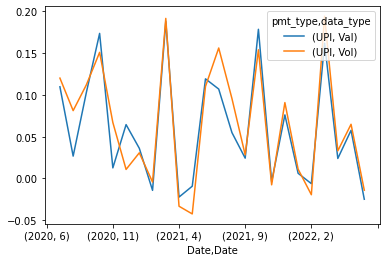

In [32]:
upi_monthly.pct_change().plot()

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


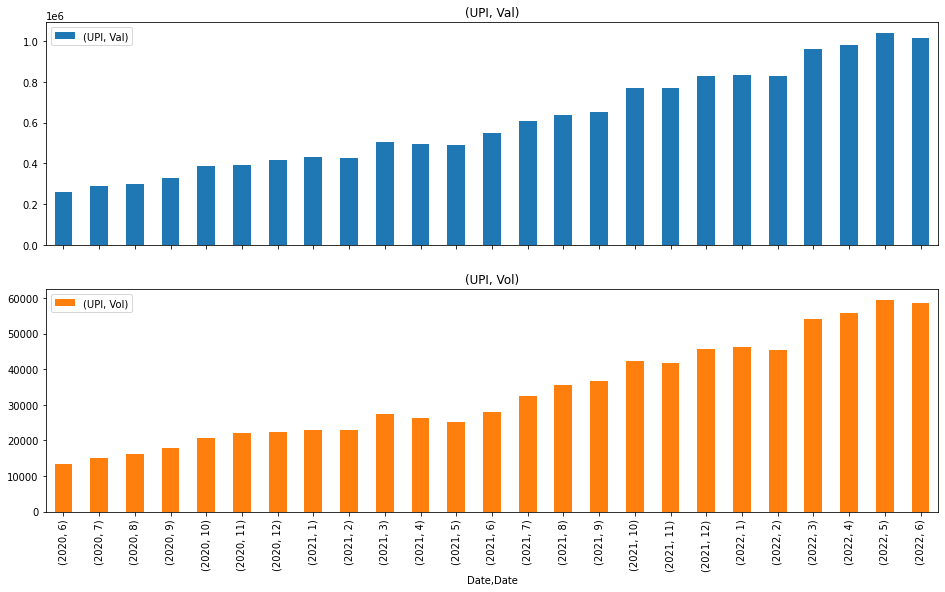

In [28]:
cleaned_pmts.groupby(by=[cleaned_pmts["Date"].dt.year,cleaned_pmts["Date"].dt.month]\
                    )[('UPI', 'Val'), ('UPI', 'Vol')].agg("sum").plot(kind="bar",subplots="True",figsize=(16,9));